In [ ]:
def plot_attention_map(model_param, opt_param):
    directory = get_directory(opt_param['lr'], 
                            opt_param['dataset_name'],
                            opt_param['loss'],
                            opt_param['opt'], 
                            opt_param['model_name'], 
                            opt_param['momentum'], 
                            opt_param['weight_decay'], 
                            opt_param['batch_size'], 
                            opt_param['epochs'], 
                            multi_run = False,
                            **model_param
                            )
    print(directory)
    with open(f'../{directory}eval_graphs.pk', 'rb') as f:
        eval_graphs = pickle.load(f)
    
    rows, cols = 1, 2
    #rows, cols = (len(epochs) - 1) // 6 + 1, min(len(epochs), 6)
    fig, axs = plt.subplots(rows,cols, figsize=(cols*2.5, rows*2))
    ax = axs[0]
    ax.imshow(eval_graphs.test_img[0][0])

In [ ]:
! python main.py --dataset cifar --model dino_vit_small --loss CrossEntropyLoss --opt sgd --lr 0.0 --epoch 0 --analysis attention_map --batch_size 128 --momentum 0.0 --weight_decay 0 --no_train --do_eval --vit_patch_size 16

results/cifar/CrossEntropyLoss/sgd/dino_vit_small/patch_size_16/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/


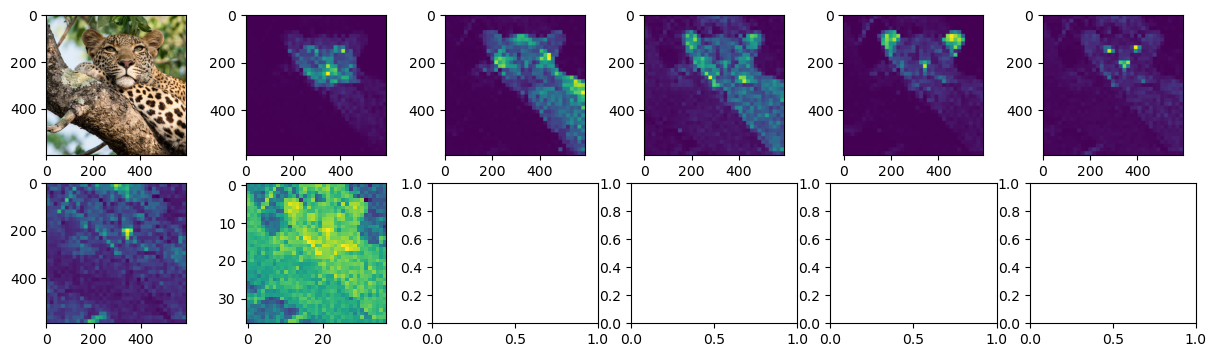

In [11]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dino_vit_small"
model_param = {"patch_size": 16}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param)


In [13]:
np.max(np.array(output_norm))

95.16881561279297

(array([3.0336e+05, 1.7408e+04, 1.1008e+04, 6.6560e+03, 5.6320e+03,
        3.3280e+03, 1.7920e+03, 5.1200e+02, 5.1200e+02, 2.5600e+02]),
 array([8.60000091e-06, 1.35670661e-03, 2.70481315e-03, 4.05291980e-03,
        5.40102599e-03, 6.74913265e-03, 8.09723884e-03, 9.44534596e-03,
        1.07934522e-02, 1.21415593e-02, 1.34896655e-02]),
 <BarContainer object of 10 artists>)

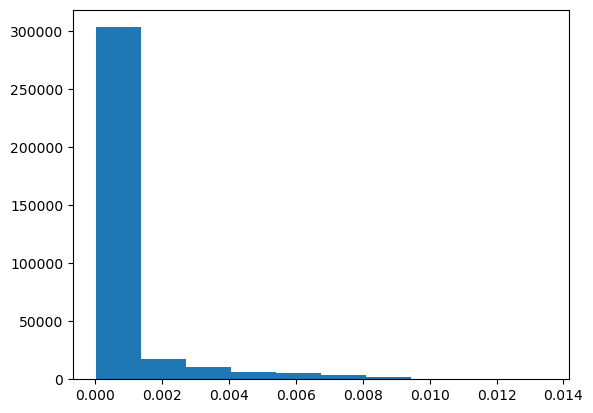

In [36]:
import numpy as np
np.sum(attention_maps[0])
np.max(attention_maps[0])
import matplotlib.pyplot as plt
plt.hist(attention_maps[0].reshape(-1))

In [ ]:
! python main.py --dataset cifar --model dinov2_vit_base --loss CrossEntropyLoss --opt sgd --lr 0.0 --epoch 0 --analysis attention_map --batch_size 128 --momentum 0.0 --weight_decay 0.0 --no_train --do_eval --vit_patch_size 14

results/cifar/CrossEntropyLoss/sgd/dinov2_vit_base/patch_size_14/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/


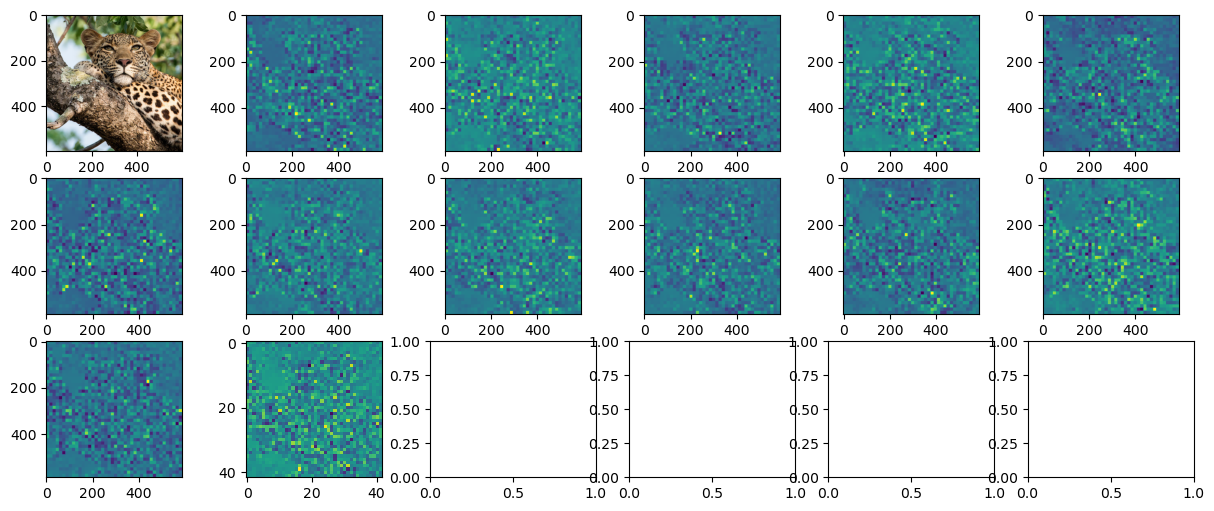

In [5]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dinov2_vit_base"
model_param = {"patch_size": 14}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param)

In [7]:
import numpy as np
np.array(output_norm).shape
np.max(np.array(output_norm))

46.22587966918945

In [33]:
import numpy as np
print(np.sum(attention_maps[0]))
print(np.max(attention_maps[0]))

195.89384
0.0008888322


(array([  1764.,  19600.,  50176., 150528.,  72716.,  34692.,   9996.,
          3528.,   1568.,   1176.]),
 array([0.00036859, 0.00042061, 0.00047264, 0.00052466, 0.00057669,
        0.00062871, 0.00068074, 0.00073276, 0.00078478, 0.00083681,
        0.00088883]),
 <BarContainer object of 10 artists>)

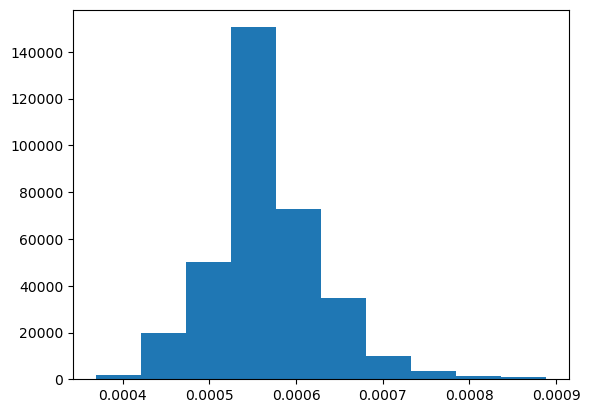

In [34]:
import matplotlib.pyplot as plt
plt.hist(attention_maps[0].reshape(-1))

In [21]:
attention_maps[0].shape

(350, 350)